In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.imdb.com/list/ls051601789/"
page = requests.get(url)

soup = BeautifulSoup(page.content)

In [3]:
name = soup.find_all("h3", class_="lister-item-header")
movies_name = []
for i in name:
    for j in i.find_all("a"):
        movies_name.append(j.text)

year = soup.find_all("span",class_="lister-item-year text-muted unbold")
year_of_release = []
for k in year:
    year_of_release.append(k.text)

rating = soup.find_all("div",class_="ipl-rating-star small")
rating_score = []
for i in rating:
    rating_score.append(float(i.text))

genre = soup.find_all("span",class_="genre")
genre_type = []
for g in genre:
    genre_type.append(g.text)

time = soup.find_all("span",class_="runtime")
Duration = []
for h in time:
    Duration.append(h.text)

netflix_top_100=pd.DataFrame({})
netflix_top_100['Movies_name']=movies_name
netflix_top_100['Year_of_release']=year_of_release
netflix_top_100['Year_of_release'] = netflix_top_100['Year_of_release'].str.replace('(', '').str.replace(')', '').str.replace('I', '')
netflix_top_100['rating_score']=rating_score
netflix_top_100['Duration']=Duration
netflix_top_100['Genre_type']=genre_type
netflix_top_100['Genre_type'] = netflix_top_100['Genre_type'].apply(lambda x: x.strip('\n'))
netflix_top_100

,Movies_name,Year_of_release,rating_score,Duration,Genre_type
0,Pulp Fiction,1994,8.9,154 min,"Crime, Drama"
1,Memento,2000,8.4,113 min,"Mystery, Thriller"
2,Big Fish,2003,8.0,125 min,"Adventure, Drama, Fantasy"
3,The Pianist,2002,8.5,150 min,"Biography, Drama, Music"
4,Reservoir Dogs,1992,8.3,99 min,"Crime, Thriller"
...,...,...,...,...,...
95,Traffic,2000,7.6,147 min,"Crime, Drama, Thriller"
96,Safety Not Guaranteed,2012,6.9,86 min,"Adventure, Comedy, Drama"
97,Super 8,2011,7.0,112 min,"Action, Mystery, Sci-Fi"
98,The Raven,2012,6.4,110 min,"Crime, Mystery, Thriller"


In [4]:
import pandas as pd
grouped_by_genre = netflix_top_100['Genre_type'].unique()
print(grouped_by_genre)

['Crime, Drama            ' 'Mystery, Thriller            '
 'Adventure, Drama, Fantasy            '
 'Biography, Drama, Music            ' 'Crime, Thriller            '
 'Action, Sci-Fi            ' 'Comedy, Crime            '
 'Drama            ' 'Biography, Drama, History            '
 'Action, Drama, Sport            ' 'Drama, Thriller            '
 'Sci-Fi, Thriller            ' 'Crime, Drama, Thriller            '
 'Comedy, Drama, Romance            ' 'Drama, Romance            '
 'Drama, Romance, Sci-Fi            ' 'Action, Drama            '
 'Action, Crime, Horror            '
 'Drama, Mystery, Thriller            '
 'Action, Biography, Drama            '
 'Crime, Drama, Mystery            ' 'Comedy, Horror            '
 'Action, Biography, Crime            '
 'Biography, Crime, Drama            '
 'Action, Crime, Thriller            '
 'Action, Adventure, Drama            '
 'Action, Drama, Family            ' 'Drama, Western            '
 'Action, Drama, History            

In [5]:
import pandas as pd

netflix_top_100['Genre_type'] = netflix_top_100['Genre_type'].str.strip()
genre_counts = netflix_top_100['Genre_type'].str.split(',').explode().str.strip().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

print(genre_counts)

        Genre  Count
0       Drama     69
1      Action     33
2       Crime     31
3    Thriller     28
4     Mystery     17
5      Comedy     14
6   Adventure     13
7   Biography     13
8      Horror      9
9     Fantasy      7
10    History      6
11     Sci-Fi      6
12    Romance      5
13      Sport      3
14        War      3
15      Music      1
16     Family      1
17    Western      1


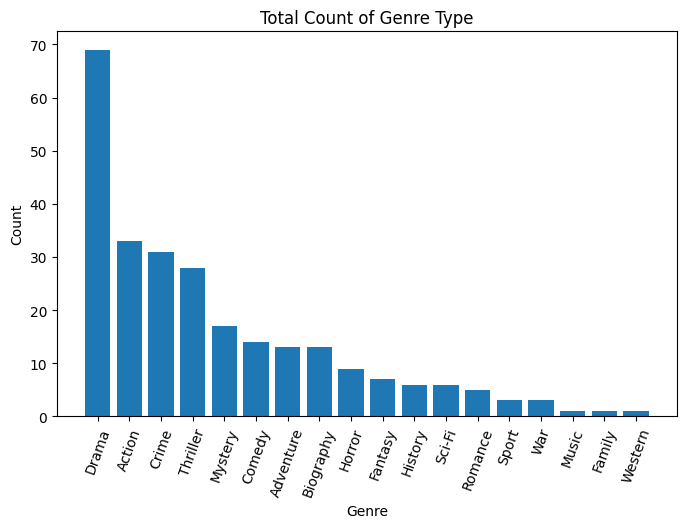

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_top_100['Genre_type'] = netflix_top_100['Genre_type'].str.strip()
genre_counts = netflix_top_100['Genre_type'].str.split(',').explode().str.strip().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

genre_counts = genre_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(genre_counts['Genre'], genre_counts['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Total Count of Genre Type')
plt.xticks(rotation=70)

plt.show()